In [24]:
import preprocess
import knowledgeGraph
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

nlp = spacy.load('en_core_web_md')
nlp.add_pipe("merge_entities")
nlp.add_pipe("merge_noun_chunks")
nlp.add_pipe('coreferee')

In [30]:
candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape

'confused and frustrated, connie decides to leave on her own.'

In [5]:
pp = preprocess.preprocess(nlp)
kg = knowledgeGraph.KnowledgeGraph(nlp)


In [19]:
text ="""
Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden anniversary"" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as ""Super Bowl L""), so that the logo could prominently feature the Arabic numerals 50
"""
question = "Who is Lionel Messi?"

sentences, _, _ = pp.process_question_context(question, text)
contextDF = kg.join_sentences_facts(sentences)
contextDF


,Subject,Relation,Objects,States,Times,Locations
0,Super Bowl 50,be,[an American football game to determine the ch...,[],[],[]
1,The American Football Conference (AFC) champio...,defeat,[the National Football Conference (NFC) champi...,[],[],[]
2,The American Football Conference (AFC) champio...,earn,[their third Super Bowl title],[],[],[]
3,Unknown,be,[],[],[],[]
4,Unknown,could,[],[],[],[]
5,Unknown,have,[],[],[],[]
6,Unknown,know,[the game],"[under which, as "" ""Super Bowl L "" ""]",[],[]
7,Unknown,name,[each Super Bowl game],[with Roman numerals ( under which the game wo...,[],[]
8,Unknown,play,[The game],"[on February 7, 2016, at Levi's Stadium in the...","[February 7, 2016]","[the San Francisco Bay Area, Santa Clara, Cali..."
9,Unknown,would,[],[],[],[]


In [36]:
contextDF = kg.join_sentences_facts(candidate_sentences['sentence'][10:20])
contextDF

,Subject,Relation,Objects,States,Times,Locations
0,Unknown,be,[],[],[],[]
1,Unknown,circle,[to bid for the film's international sales rig...,[],[],[]
2,Unknown,do,[],[],[],[]
3,Unknown,fly,[],[],[],[]
4,Unknown,m,[global],[],[],[]
5,Unknown,military force,[],[],[],[]
6,canadian musician robbie robertson,supervise,[the soundtrack],[],[],[]
7,it,be,[the worst reviewed film in the franchise],[],[],[]
8,it,feature,[both original and existing music tracks],[],[],[]
9,kota eberhardt,portray,[telepath selene gallio],[],[],[]


In [37]:
# if there is more than 1 element in Objects column, take the first one and if empty list make it ""
updatedDF = contextDF.copy()
updatedDF['Objects'] = updatedDF['Objects'].apply(lambda x: x[0] if len(x) > 0 else "")
updatedDF['States'] = updatedDF['States'].apply(lambda x: x[0] if len(x) > 0 else "")
updatedDF['Times'] = updatedDF['Times'].apply(lambda x: x[0] if len(x) > 0 else "")
updatedDF['Locations'] = updatedDF['Locations'].apply(lambda x: x[0] if len(x) > 0 else "")
updatedDF

,Subject,Relation,Objects,States,Times,Locations
0,Unknown,be,,,,
1,Unknown,circle,to bid for the film's international sales rights,,,
2,Unknown,do,,,,
3,Unknown,fly,,,,
4,Unknown,m,global,,,
5,Unknown,military force,,,,
6,canadian musician robbie robertson,supervise,the soundtrack,,,
7,it,be,the worst reviewed film in the franchise,,,
8,it,feature,both original and existing music tracks,,,
9,kota eberhardt,portray,telepath selene gallio,,,


In [38]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(updatedDF, "Subject", "Objects", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

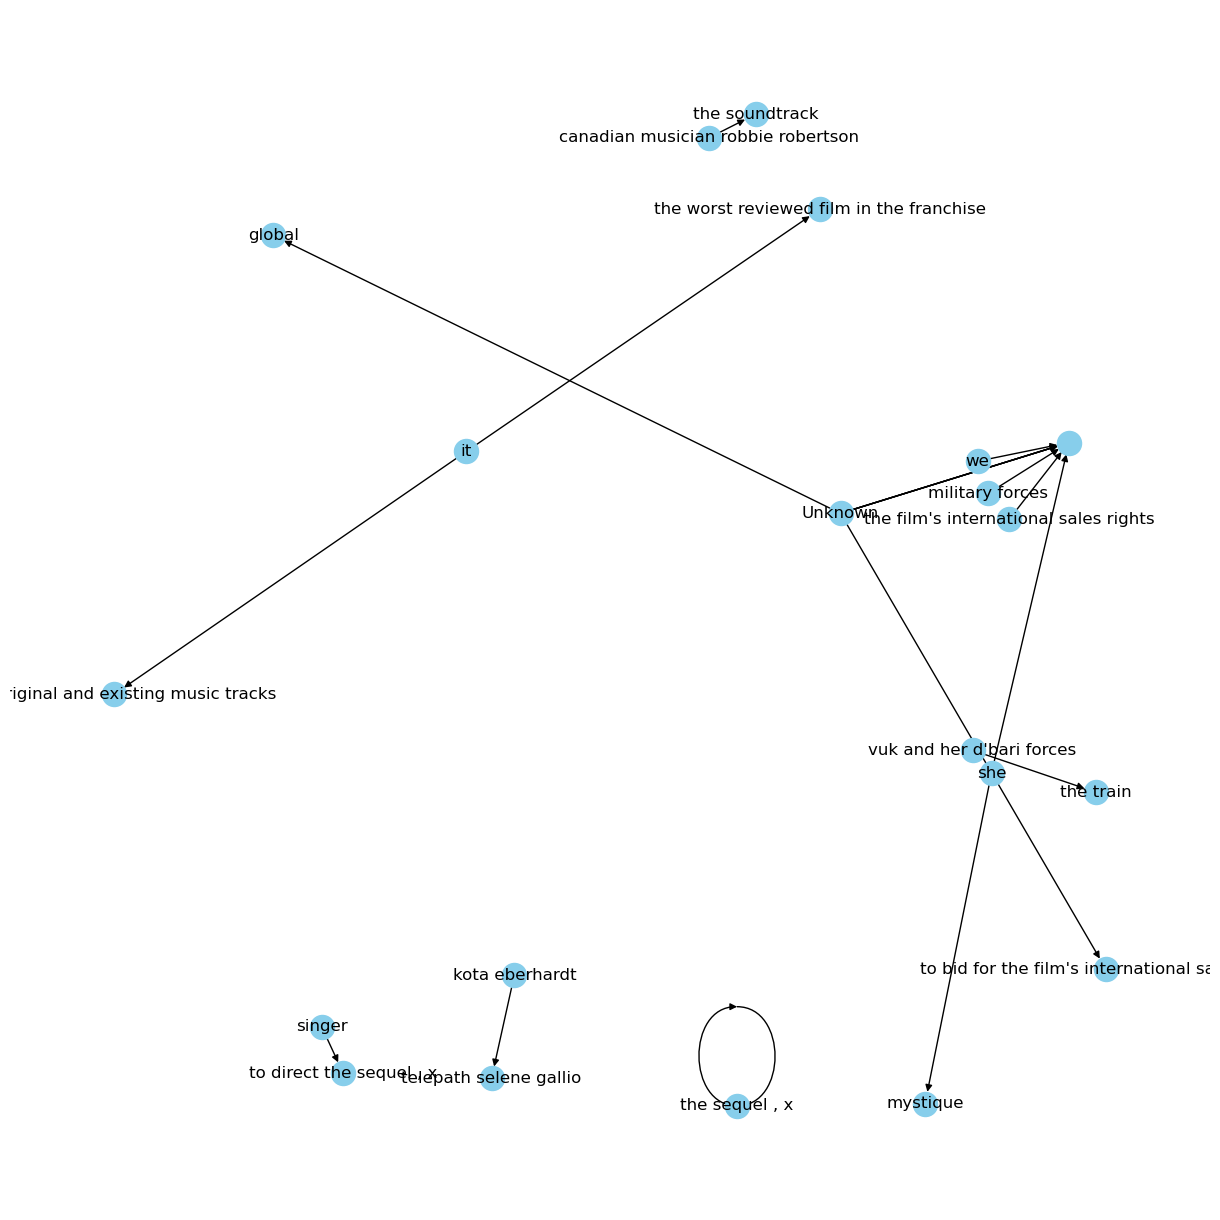

In [39]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()